# Feature Selection



- Find useful variables for our ML model.
- Most important part of the pretreatment.
- Too many variables negatively affect the model.

         Selection: Use statistical test to select the most useful variables for the model.

                                  sklearn.feature_selection

# VarianceTreshold

- Delete all variables with a variance below a certain threshold.
- Objective: Remove the variables with very low variance.

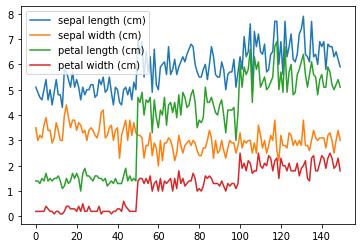

In [93]:
# Example

from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
iris=load_iris()
x=iris.data
y=iris.target

plt.plot(x)
plt.legend(iris.feature_names)

- Big Variance for petal length
- Low Variance for sepal width

In [94]:
x.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

- Creat an object of the transformer.
- Get rid of the Column beyond the treshold.

In [95]:
selector=VarianceThreshold(threshold=0.2)
selector.fit_transform(x)


array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [96]:
selector.get_support()

array([ True, False,  True,  True])

In [97]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

# SelectKBest

- Select K variables X such that the dependency test with Y variable is the highest.
-Dependency Test : 

 - feature_selection.chi2(x,y)
 - feature_selection.f_classif(x,y)
 - feature_selection.f_regression(x,y[,center])
 - feature_selection.mutual_info_classif(x,y)
 - feature_selection.mutual_info_regression(x,y)

In [98]:
from sklearn.feature_selection import SelectKBest, chi2

In [99]:
chi2(x,y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

- The first array (Numpy Table) show the dependency test result of all x variables with the y variable.
- We can see an hight dependency of the third variable .

- The second array (Numpy Table) show p values of all variables.

# k=1 
   -Return the variable with the highest dependency score.
   - For us the third one 
    - (array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
      

In [100]:
selector=SelectKBest(chi2,k=1)
selector.fit_transform(x,y)

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [101]:
selector.get_support()

array([False, False,  True, False])

# k=2 
   -Return the  2 variables with the highest dependency score.
   - For us the third one and the fourth one.
    - (array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),

In [102]:
selector=SelectKBest(chi2,k=2)
selector.fit_transform(x,y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [103]:
selector.get_support()

array([False, False,  True,  True])

# SelectFromModel (SGD)

- Train an estimator then select the most important variables for this estimator.


Note :

- This will only work with the model that develops a parametric function: 

(.coef_ or .feature_imilibre_) therefore k-the nearest neighbor is incompatible.

In [104]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

# Step 1 :Train an SGDClassifier estimator. 
#### This estimator will be trained on x and y and will develop a coefficient.
#### To select the most important variables, we will use a threshold.
#### We want to select variables for which their coefficients are greater than a certain AVERAGE of all the coefficients.

In [105]:
selector =SelectFromModel(SGDClassifier(random_state=0),threshold='mean')
selector.fit_transform(x,y)


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [106]:
selector.get_support()

array([False, False,  True,  True])


## Step 2 : Allows you to see all the coefficients developed by the SGD estimator.

In [107]:
x.shape

(150, 4)

In [108]:
y.shape

(150,)

## Step 3 : Find the Z matrix :There are 3 classes for the variables y therefore with onehot encoding we obtaine a shape (150.3)

- (150.4) * Z = (150.3)
- Z must be a matrix (150.3).
- Z is the following matrix:

In [109]:
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

- The columns are all coeff for all the different variables.
- The lines are coeff for all classes of y.
- The SelectFromModel will calculate the average of all the coefficients of the variables :
        Ex :
           - (8.64029104+-5.48888269+-81.28026953)/3
           - (27.2851296+-58.79616709+-75.17372078)/3

In [110]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])


# Step 4 : Then he averages this table.
        

In [111]:
selector.estimator_.coef_.mean(axis=0).mean()

-0.9721175565229512

## Step 5 : Selects variables greater than this average value: -0.9721175565229512

In [112]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

###  Only 37.87734374,  19.83872585 are greather than -0.9721175565229512 so those variables are selected. 

In [113]:
selector.get_support()

array([False, False,  True,  True])

# RFE + RFECV


- This method is the same as before, but with this technique, we will perform the process recursively, which means that all the selected variables will be fed back into the estimator.


In [114]:
from sklearn.feature_selection import RFE,RFECV

In [115]:
# step 1: how many variables we want to eliminate at each iteration.

# min_features_to_select: with how many variables we want to end with.

# cv: How many divisions for our cross validation.

selector = RFECV(SGDClassifier(),
                 step=1,
                 min_features_to_select=2,
                 cv=5)
selector.fit(x,y)


RFECV(cv=5,
      estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                              early_stopping=False, epsilon=0.1, eta0=0.0,
                              fit_intercept=True, l1_ratio=0.15,
                              learning_rate='optimal', loss='hinge',
                              max_iter=1000, n_iter_no_change=5, n_jobs=None,
                              penalty='l2', power_t=0.5, random_state=None,
                              shuffle=True, tol=0.001, validation_fraction=0.1,
                              verbose=0, warm_start=False),
      min_features_to_select=2, n_jobs=None, scoring=None, step=1, verbose=0)

# Ranking of all variables:

In [116]:
selector.ranking_

array([2, 1, 1, 1])

## The variables 2,3,4 same Impotances , FIRST PLACE ,  Same Ranking
- The first variable was eliminate

## The score of the SGDClassifier at each iteration:

In [118]:
selector.grid_scores_

array([0.81333333, 0.83333333, 0.80666667])

# Explanation:
- The SGD was Train once: it obtained a score of 0.81333333 then it deleted a variable.
- The SGD was Train a second time: it obtained a score of 0.83333333 then it deleted another variable.
- The SGD was Train a third time: it obtained a score of 0.80666667. It's less than before so it retrieved the last deleted variable.